## Linear Regression, One Hot Encoding, Logistic Regression

### Basic Code For Linear Regression
This is for multivariable Linear Regression
We have homeprices for many homes with multiple features which we need to include in model

In [40]:
## Importing 'them libs' xD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [95]:
# Accessing the basic CSV file for linear regression
data = pd.read_csv('DataSets/homeprices_multi-varaible.csv')
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [96]:
data.bedrooms = data.bedrooms.fillna(data.bedrooms.mean())
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [97]:
# Basic Linear Model calling
Regressor = linear_model.LinearRegression()
Regressor.fit(data.drop('price',axis=1),data.price)

LinearRegression()

In [98]:
Regressor.predict([[3300,4,22]])

array([610754.00226644])

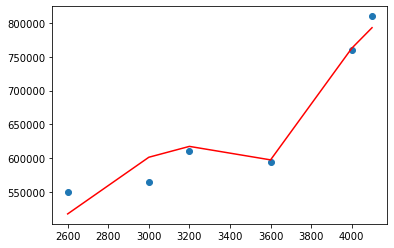

In [103]:
plt.scatter(data.area,data.price)
plt.plot(data.area,Regressor.predict(data.drop('price',axis=1)),color='red')
plt.show()
# A werid fit but it is the data itself
# The thing is nt linear because of the skewed datasets...what to do

#### Some Basic HomeWork Problem
The File 'hiring.csv',contains hiring statics for a firm such as experience of candi-date, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates

1. 2 yr experience, 9 test score, 6 interview score. 
2. 3 yr experience, 10 test score, 10 interview score

In [71]:
homedata = pd.read_csv('Datasets/hiring.csv')
homedata.experience= homedata.experience.fillna('zero')
homedata['test_score(out of 10)'] = homedata['test_score(out of 10)'].fillna(homedata['test_score(out of 10)'].mean())
homedata

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.000000,9,50000
1,zero,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [72]:
#Importing a new library to replce words with numbers
from word2number import w2n
homedata.experience = homedata.experience.apply(w2n.word_to_num)
homedata

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [73]:
Regressor.fit(homedata.drop('salary($)',axis=1),homedata['salary($)'])

LinearRegression()

In [76]:
input2check = ([2,9,6],[3,10,10])
Regressor.predict(input2check)

array([53290.89255945, 66819.36588954])

#### Problem Solved!!

### One Hot Encoding with Dummy Variables
Also should learn how to avoid the dummy variable trap

In [81]:
da1 = pd.read_csv("DataSets/homeprices-extra.csv")
da1

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [84]:
dum_var = pd.get_dummies(da1.town)
merged = pd.concat([da1,dum_var],axis='columns').drop(['town'],axis='columns')
merged

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [87]:
fin = merged.drop(['west windsor'],axis=1)  #This is for stopping the dummy trap variable
X = fin.drop('price',axis=1)
Y = fin.price

In [88]:
Regressor2 = linear_model.LinearRegression()
Regressor2.fit(X,Y)

LinearRegression()

In [109]:
inp = [[3400,0,0],[2800,0,1]]
y = Regressor2.predict(inp)
print("The predicted values for inputs x and y are",y[0],'dollars and',y[1],'dollars')
#Ofcourse the value is in dollars, we won't get even a scooty for 50,000 rupees xD.

The predicted values for inputs x and y are 681241.6684583914 dollars and 590775.639647394 dollars


#### Exercise for One Hot Encoding
The file 'carprices.csv' has car selling prices for 3 different models . Build a model that can answer following questions,
1) Predict price of a mercedez benz that is 4 yr old with mileage 45000   
2) Predict price of a BMW X5 that is 7 yr old with mileage 86000       
3) Find the score (accuracy) of your model.                             

In [4]:
da2 = pd.read_csv('DataSets/carprices-exer.csv')
da2

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [12]:
dum_var = pd.get_dummies(da2['Car Model'])
da2 = (pd.concat([da2,dum_var],axis=1)).drop('Car Model',axis=1)
da2

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [36]:
# readied both x and y data
mod = linear_model.LinearRegression()
X = da2.drop(['Sell Price($)'],axis=1)
Y = da2['Sell Price($)']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=1)

In [37]:
mod.fit(X_train,Y_train)

LinearRegression()

In [38]:
test_vals = [[45000,4,0,0,1],[86000,7,0,1,0]]
mod.predict(test_vals)
#And God said...."Let there be answers!"

array([36392.32736724, 12938.36317047])

In [39]:
mod.score(X_test,Y_test)

0.8399930950342042

Ehhh...not that great of accuracy...but who cares, this is just machine learning...maybe DL has some awesome improvements. The exercise is completed!

### Logistic Regression Multiclass
I'm going to write code for it and i'm skipping single class as it can be done the same as linear regression single class. This is going to use the MNIST dataset

In [130]:
from sklearn import datasets

In [131]:
#loading the digits a whopping 1797 images of matrix like stuff
digits = datasets.load_digits()
X1 = digits.data
Y1 = digits.target
X1.shape

(1797, 64)

<Figure size 432x288 with 0 Axes>

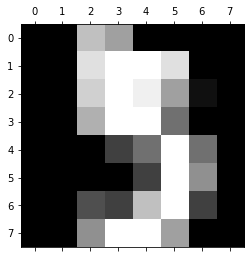

In [132]:
plt.gray()
plt.matshow(digits.images[5])
plt.show()

In [133]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,test_size=0.4,random_state=1)

In [134]:
model2 = linear_model.LogisticRegression(max_iter=20000)
model2.fit(X1_train,Y1_train)

LogisticRegression(max_iter=20000)

In [135]:
model2.score(X1_test,Y1_test)

0.9652294853963839

96% Accuracy? That's awesome!!

array([0, 3])

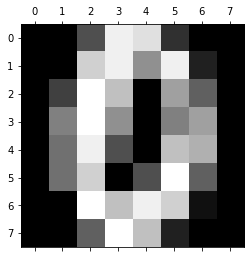

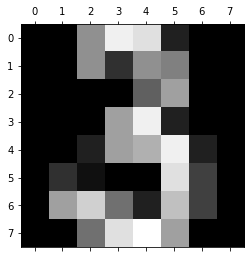

In [62]:
#Let's try out for 1 stuff
plt.matshow(digits.images[666])
plt.matshow(digits.images[999])
model2.predict([digits.data[666],digits.data[999]])

In [136]:
#Let us draw a confusion matrix
y1_predicted = model2.predict(X1_test)

from sklearn.metrics import confusion_matrix
confu_mat = confusion_matrix(Y1_test,y1_predicted)
confu_mat

array([[74,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 64,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  0, 68,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 80,  0,  0,  0,  0,  2,  1],
       [ 0,  1,  0,  0, 78,  0,  0,  0,  0,  0],
       [ 0,  2,  1,  0,  0, 60,  2,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 69,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  0, 72,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  1, 59,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0,  3, 70]], dtype=int64)

Text(42.0, 0.5, 'Actual Number')

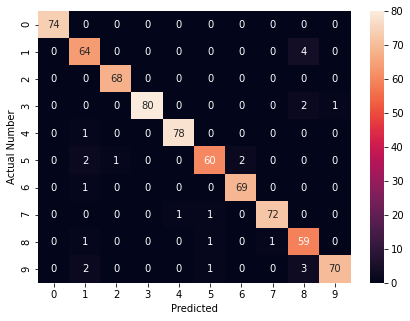

In [137]:
#Let's visualize this using seaborn!
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(confu_mat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual Number')

#### Excercises on Logistic Regression
1. From the dataset 'HR_comma_sp.csv' build a logistic regression model.
Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
1.Plot bar charts showing impact of employee salaries on retention
2.Plot bar charts showing corelation between department and employee retention
3.Now build logistic regression model using variables that were narrowed down in step 1
4.Measure the accuracy of the model

In [140]:
data3 = pd.read_csv('DataSets/HR_comma_sep.csv')
data3.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<AxesSubplot:xlabel='Department'>

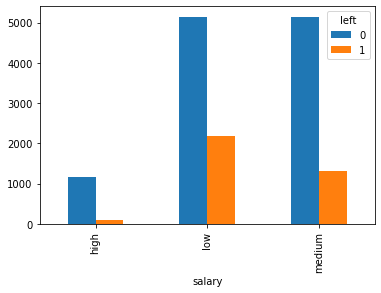

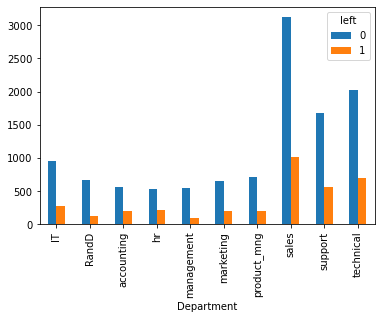

In [143]:
# I think that is unnecessary
# data3 = data3.drop(['last_evaluation'],axis=1)
pd.crosstab(data3.salary,data3.left).plot(kind='bar')
pd.crosstab(data3.Department,data3.left).plot(kind='bar')

In [124]:
dep_dum = pd.get_dummies(data3['Department'])
sal_dum = pd.get_dummies(data3['salary'])
data3 = pd.concat([data3,dep_dum,sal_dum],axis=1)
data3.drop(['salary','Department'],axis=1,inplace=True)

In [125]:
data3

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [126]:
Y2 = data3.left
X2 = data3.drop('left',axis=1)

In [127]:
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2,test_size=0.4,random_state=1) 

In [128]:
model3 = linear_model.LogisticRegression(max_iter=20000)
model3.fit(X2_train,Y2_train)

LogisticRegression(max_iter=20000)

In [129]:
model3.score(X2_test,Y2_test)

0.7851666666666667

It is what it is...just pathetic 78%? I must be doing something wrong! Oh wait no...this is correct!